# Todays Lecture: Introduction to Scikit-Learn                       

# Topics

1. Training a Binary Classifier
2. Measuring performance using 
  - Confusion Matix
  - Cross-validation
3. Training Models
  - Linear Regression
  - Logistic Regression
4. Support Vector Machines
5. Decision Tree Classifiers
6. Random Forest

# 1. Training a Binary Classifier

## 1.1 MNIST Dataset

+ 70000 small images (28x28) of digits (0-9) 
+ Each digit is labeled
+ It's been studied so much that it's called the "Hello World" of machine learning
+ Scikit-Learn downloads this dataset by default.
+ Lets fetch the data with scikit-learn

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

##### Why 784?

+ Each image is 28x28 pixels in size. Which is 784 pixels in total
+ Each pixel can be black(0) to white(255)

#### A small sample
![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## 1.2 Training and Testing

We will have to split a dataset into training and testing set before doing anything else. So let's go ahead and do that.

In [5]:
# Training
# --------

# First 50k out of 70k datapoints are training
X_train = X[:50000]  
y_train = y[:50000]

# Testing
# -------

# Last 20k out of 70k are testing set 
X_test  = X[50000:]  
y_test  = y[50000:]

+ It's always a good idea to shuffle the training data so as not to bias the classifier. Especially when we do cross-validation (more on that later).

**Question: Sometimes shuffling can be very bad idea. Can you think of a situation when?**


In [6]:
import numpy as np

# Create a random permutaion of 0-49999
shuffle = np.random.permutation(50000)

# Randomize data
# --------------
X_train = X_train[shuffle]
y_train = y_train[shuffle]

## 1.3 Your first Binary Classifier in Scikit-Learn

+ In a binary classifier, you classify if a test instance belong to one class (True) or not (False).
+ For example, let's classify if an image is `0` or not in our MNIST dataset.
+ Let's modify our training and testing labels to reflect this.


In [7]:
y = (y == 0)
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)

### Formatting Datasets To work with  Scikit-Learn

To format you datasets, use the following format:

```
Train = list[list]
of size m x n
Where,
  m = number of rows (training samples)
  n = number of features (columns)

E.g.,

  a   b   c
[[1,  2,  3],
 [1,  1,  3],
 .    .   .
 .    .   .
 .    .   .
 .    .   .
 .    .   .
 [3,  5,  6]
]

Test = list

E.g.,
 class
[True,
 False,
 True,
 False,
 .
 .
 .
 .
 .
 True
]
```

### Training a Stochastic Gradient Descent on Scikit-Learn

Don't worry about how this algorithm works. We can discuss this offline if you are interested.

Let's train a stochastic gradient descent with sklearn on python for the above dataset.

In [8]:
from sklearn.linear_model.stochastic_gradient import SGDClassifier

# Instantiate a classifier
# ------------------------
clf = SGDClassifier(random_state=0, max_iter=500, tol=1e-6)  
# See how we use a random_state parameter. This is the seed. 
# You want to set this for reproducibility

# Fit the data
# ------------
clf = clf.fit(X_train, y_train_0)


# 2. Performance measure

Before we start predicting, let's discuss how we would go about measuring the performance of a binary classifier.

## 2.1 Confusion Matrix

Confusion matrices are your best friend when you do supervised learning. They let you compute every thing!

Take a look at [this](https://en.wikipedia.org/wiki/Precision_and_recall#Definition_(classification_context)) link.

Let's go back a step to our original stochastic gradient classifier with X_train and y_train_0, etc.

Let's look at how we'd go about doing this with sklearn.

In [ ]:
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from sklearn.metrics import confusion_matrix

# Instantiate a classifier
# ------------------------
clf = SGDClassifier(random_state=0, max_iter=500, tol=1e-6)  
# See how we use a random_state parameter. This is the seed. 
# You want to set this for reproducibility

# Fit the data
# ------------
clf = clf.fit(X_train, y_train_0)

# Predict
# -------
y_pred = clf.predict(X_test)

# Confusion Matrix
# ----------------
cmat = confusion_matrix(y_test_0, y_pred)
cmat

### What does the confusion Matrix Look Like?
This:
```
--|-------------|-------------------|------------------|--
  |             |  Predicted=False  |   Predicted=True |
--|-------------|-------------------|------------------|--
  |actual=False |   TRUE NEGATIVE   |   FALSE POSITIVE |
--|-------------|-------------------|------------------|--
  |actual=True  |   FALSE NEGATIVE  |   TRUE POSITIVE  |
--|-------------|-------------------|------------------|--
```

Once you have this, you can compute everything from [the wikipedia page](https://en.wikipedia.org/wiki/Precision_and_recall#Definition_(classification_context)).

E.g,
```
               TP
precision =  -------
             TP + FP

               TP
recall =     -------
             TP + FN
```

### Measuring Precision and Recall

In [ ]:
# Precision
# ---------
prec = cmat[0,0]/(cmat[0,0]+cmat[0,1])
print("Precision: {:.2f}".format(prec))

# Recall
# ------
recall = cmat[0,0]/(cmat[0,0]+cmat[1,0])
print("Recall: {:.2f}".format(recall))


## 2.2 Cross-validation

In a k-fold cross-validation: 
 1. We split the data into "k" folds. 
 2. We train a classifier on "k-1" of the folds
 3. We test it on the remaining fold.
 4. Repeat this until all the k folds have been part of the test set.

**Question: When would this be a bad idea?**



In [10]:
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.base import clone  

# Stratification attempts to maintain the realtive ratios
# of positive and negative classes in each of folds.
# This is very helpful for skewed datasets (read: SE Data)
skfolds = StratifiedKFold(n_splits=5, random_state=0)

# Create and instance of your classifier
clf = SGDClassifier(random_state=0, max_iter=500, tol=1e-6)  

fold = 0
for train_index, test_index in skfolds.split(X, y):
    # Deep copy here, when you do cross-validation, it's always a good idead
    # not to mess with the original classifier. 
    
    # We need a "clean" classifier for every fold. Otherwise your mixing the
    # training and testing data form different folds. That's a no-no.
    cloned_clf = clone(clf)

    # Training data
    # -------------
    X_train_folds = X[train_index]
    y_train_folds = y[train_index]
    
    # Testing data
    # ------------
    X_test_folds = X[test_index]
    y_test_folds = y[test_index]
    
    # Fit a classifier on the training data
    # -------------------------------------
    cloned_clf.fit(X_train_folds, y_train_folds)
    
    # Make predictions on a test set
    # ------------------------------
    y_hat = cloned_clf.predict(X_test_folds)
    
    # Compute some metrics here. Like Precision, Recall, False Alarm, or what have you.
    # ---------------------------------------------------------------------------------
    cmat = confusion_matrix(y_test_folds, y_hat)
    
    # Precision
    # ---------
    prec = cmat[0,0]/(cmat[0,0]+cmat[0,1])
    
    # Recall
    # ------
    recall = cmat[0,0]/(cmat[0,0]+cmat[1,0])
    
    # Print outputs
    # -------------
    print("Fold {}: Precision = {}; Recall = {}".format(fold, round(prec, 2), round(recall, 2)))
    fold += 1

Fold 0: Precision = 0.88; Recall = 0.96
Fold 1: Precision = 0.92; Recall = 0.98
Fold 2: Precision = 0.95; Recall = 0.82
Fold 3: Precision = 0.97; Recall = 0.88
Fold 4: Precision = 0.96; Recall = 0.93


# 3. Training Models

## 3.1 Linear Regression

+ Given `n` features (x_1, x_2, ..., x_n). Linear regression says:

```
y_pred = w_0 + w_1 * x_1 + w_2 * x_2 + .... + w_n * x_n
```

Where, 

```
w_0 = Bias term
y_pred = predicted values
x_1...x_n = Features
w_1...w_n = feature weights
```

+ Given training data, we try to find the feature weights (w_0...w_n) to minimize the total number of missclassifications
  * We do this using a gradient descent
  
+ Let's generate some linear looking data and see how we could use sklearn for this.

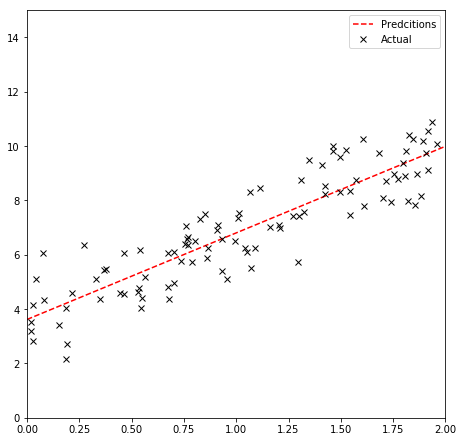

In [11]:
%matplotlib inline

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
# y = 3x + 4 + gaussian noise
y = 4 + 3 * X + np.random.randn(100, 1)

# Instantiate model
lin_reg = LinearRegression()

# Fit data
lin_reg = lin_reg.fit(X, y)

# Test data = [0, 2]
X_test = np.array([
    [0], 
    [2]]
) 

# Predict
y_pred = lin_reg.predict(X_test)


# Plot
plt.figure(figsize=(7.5,7.5))
plt.plot(X_test, y_pred, "r--")
plt.plot(X, y, "kx")
plt.axis([0,2,0,15])
_ = plt.legend(['Predcitions', "Actual"])

## 3.2 Logistic Regression: A Good Baseline Classifier 

1. Linear regression won't directly work for binary classification.
2. Instead, we map the output of the linear regression (which can be unbounded) to bounded sigmoid function.
![](https://i.stack.imgur.com/i0Jkf.png)
Where,
```
z=w_0 + w_1 * x_1 + w_2 * x_2 + .... + w_n * x_n
```
3. See how when z > 0 then S(z) > 0.5 and when z < 0 then S(z) < 0.5.
4. Basically, training involves finding the feature weights (w) that satisifies this. 

*If you want to know more, we can chat offline.*



### The IRIS Dataset

+ Let's pick a slightly different dataset: Iris.

+ Let's load the dataset

In [12]:
from sklearn import datasets

iris = datasets.load_iris()

# Features
print("Features: ", iris['feature_names'])

# Classes
print("Classes", set(iris['target']))

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes {0, 1, 2}


## 3.3 Training a Logistic Regression

+ Let's predict for class `2` using Logistic Regression

In [13]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Load Dataset
# ------------
iris = datasets.load_iris()

# Features
# --------
X = iris["data"]
y = (iris["target"] == 2).astype(np.int)

logit_clf = LogisticRegression()
_ = logit_clf.fit(X,y)

+ Let's look at how the classifier for one feature (petal width) look.

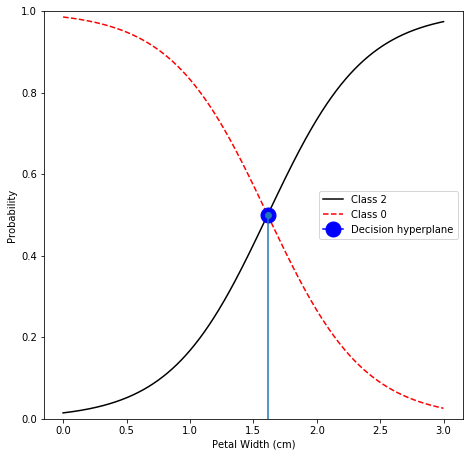

In [14]:
%matplotlib inline

import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load Dataset
# ------------
iris = datasets.load_iris()

# Features
# --------
X = iris["data"][:,3:] # Only feature 3 (the petal width)
y = (iris["target"] == 2).astype(np.int)  # Predict for class 2

# Instantiate
# -----------
logit_clf = LogisticRegression()

# Fit classifier
# --------------
logit_clf = logit_clf.fit(X,y)

# Generate a test dataset
# -----------------------
X_test = np.linspace(0,3,1000).reshape(-1,1)  # Generate 1000 values between 0 and 3

# Obtain perdiction probabilities
# -------------------------------
y_prob = logit_clf.predict_proba(X_test)

# Plot the probabilities
# ----------------------
plt.figure(figsize=(7.5,7.5))
plt.ylim(0,1)
plt.plot(X_test, y_prob[:,1], "k-", label="Class 2")
plt.plot(X_test, y_prob[:,0], "r--", label="Class 0")
plt.ylabel("Probability")
plt.xlabel("Petal Width (cm)")
plt.plot([1.615], [0.5], marker='o', markersize=15, color="b", label="Decision hyperplane")
plt.stem([1.615], [0.5])
_ = plt.legend()

+ Decision hyperplane is actual n-dimensional. 
    - Where n in the number of features
    - Here it a 1-D point at `petal width = 1.615`.
    - We have 1-feature that's why.
+ See how at `petal width = 1.615` the probabilities of positive and negative class swap `probability>0.5`?
+ Now if we were to call predict for two test cases on either side of the hyperplane, we should get the correct classes.
+ Let's make sure:

In [15]:
test_pos = [2.0] # True
test_neg = [1.0] # False

test = [test_pos, test_neg]

pred = logit_clf.predict(test)

print("Test_pos", pred[0] == 1)
print("Test_neg", pred[1] == 1)


Test_pos True
Test_neg False


# 4. SVM: Great for Text Mining!

### Good and Bad Decision Hyperplanes
+ Let's say we are looking at 2 dimensions `x1` and `x2`.
+ In the below image on the left all three are valid 2-hyperplanes.
  - **Q. What is wrong with these hyperplanes on the left?**
<img src="https://www.safaribooksonline.com/library/view/python-deeper-insights/9781787128576/graphics/3547_03_07.jpg" alt="Drawing" style="width: 1800px;"/>


### How SVM works
+ Intuition: Instead of drawing *one* line, why don't we draw *two* lines (aka. margins)?
+ Think roads.
+ The actual hyperplane will be in between these 2 margins.
+ SVM works by looking for a hyperplane that maximizes the *margin* (think: road width) between the two classes.

## 4.1 Training a Linear SVM in scikit-learn

Let's go ahead and train a linear SVM in sklearn

In [16]:
import numpy as np
from sklearn import datasets
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

iris = datasets.load_iris()

# Training
# --------
# Lets use 2 features

X_train = iris['data'][:, :2]  # All rows, columns 1, 2.
y_train = (iris["target"] == 2).astype(np.int)  # Predict for class 2

# Instantiate 
# -----------

svm_clf = LinearSVC(C=1, loss="hinge")
#                   =================
#                    Hyperparameters


# Fit the data to the classifier
# ------------------------------
svm_clf = svm_clf.fit(X_train, y_train)

# Predict for a test set
# ----------------------

X_test = [
    [5.7, 1.9],      # <----- Test instance 1
    [1.0, 0.1]       # <----- Test instance 2
]

pred = svm_clf.predict(X_test).astype(np.bool)
print("\n".join(map(str, pred)))

True
False


## Plot for fun

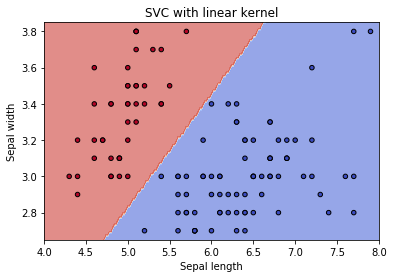

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = (iris["target"] == 0).astype(np.int)  # Predict for class 0

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = svm.LinearSVC(C=1)
models = clf.fit(X, y)

# title for the plots
title = 'SVC with linear kernel'

# Set-up 2x2 grid for plotting.
fig, ax = plt.subplots(1, 1)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, models, xx, yy, cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(4, 8)
ax.set_ylim(2.65, 3.85)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_title(title)

plt.show()

# Note
+ There's a **LOT** more to SVM:
  - Hyperparameters (we used C=1 and loss="hinge", there more)
  - Kernels (Linear, Polynomial, RBF, etc.)
  - Soft Margins
+ If you are doing an NLP project, it would be very helpful to understand these!
+ That said, we have seen that a simple Linear SVM works great in NLP.

# 5. Decision Trees

+ We already know how decision trees work. So let's skip the theory.

## 5.1 Building a Decision Tree with Scikit-Learn

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, :2]
y = (iris.target == 0).astype(np.int)

# Instantiate Classifier
# ----------------------
dtree_clf = DecisionTreeClassifier(   
            criterion = 'entropy',    #
            max_depth = 2,            # 
            min_samples_split = 10,   #   <----- Hyperparameters
            min_samples_leaf = 5,     # 
            max_leaf_nodes = 20)      #  

# Fit Training Data
# -----------------
dtree_clf = dtree_clf.fit(X, y)

## Visualizing the Tree

+ We can use a package called [graphviz](http://graphviz.org) to visualize

In [21]:
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, :2]
y = (iris.target == 0).astype(np.int)

# Instantiate Classifier
# ----------------------
dtree_clf = DecisionTreeClassifier(   
            criterion = 'entropy',    #
            max_depth = 2,            # 
            min_samples_split = 10,   #   <----- Hyperparameters
            min_samples_leaf = 5,     # 
            max_leaf_nodes = 20)      #  

# Fit Training Data
# -----------------
dtree_clf = dtree_clf.fit(X, y)

export_graphviz(dtree_clf,
               out_file = 'iris_dtree.dot',
               feature_names = iris.feature_names[:2],
               class_names = ['0', '1', '2'],
               rounded = True,
               filled = True)

In [23]:
%%sh

dot -Tpng iris_dtree.dot -o iris_dtree.png

## Predicting and Estimating class probabilities

In [27]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, :2]
y = (iris.target == 0).astype(np.int)

# Instantiate Classifier
# ----------------------
dtree_clf = DecisionTreeClassifier(
            criterion = 'entropy',    #
            max_depth = 2,            # 
            min_samples_split = 10,   #   <----- Hyperparameters
            min_samples_leaf = 5,     # 
            max_leaf_nodes = 20)      #  

# Fit Training Data
# -----------------
dtree_clf = dtree_clf.fit(X, y)

# Generate some test data
# -----------------------
X_test = [[50, 15]]

# Predict
# -------
pred = dtree_clf.predict(X_test)

# Predict Probablity
# ------------------
pred_prob = dtree_clf.predict_proba(X_test)

# Print
# -----
print("Test: ", X_test[0])
print("Predicted: ", bool(pred[0]==0))
print("Probabilites: \n\t True={}\n\tFalse={} ".format(round(pred_prob[0][0], 2), round(pred_prob[0][1], 2)))

Test:  [50, 15]
Predicted:  False
Probabilites: 
	 True=0.38
	False=0.62 


# 6. Random Forests: Great in SE Datasets!

+ When in doubt, use Random Forests for software engineering data. 
+ It seems to work very well.

## How does it work?

+ Instead of building one decision tree, build `K` decision trees.
+ Build trees on diffrent subsets of *both rows and columns* of the training data.
+ Then for a test instance, 
    - Ask each of the `K` trees what the predictions are.
    - Return the *mode* of those predictions.
    - **Q. What is mode?**
        - `array = [1,1,1,0,0]` --> Three 1's and Two 0's ---> mode is 1

### Random Forests in Scikit-Learn
+ You probably know the drill by now. So let's get to it. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load data
# ---------
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target == 0).astype(np.int)

# Instantiate Classifier
# ----------------------
rf_clf = RandomForestClassifier(random_state=0,     # Random seed must be set!
                                n_estimators=10,    # Number of decision trees to build
                                max_leaf_nodes=16,  # Maximum number of leaf nodes
                                n_jobs = -1)        # Use all the cores to build the trees

# Fit Training Data
# -----------------
rf_clf = rf_clf.fit(X, y)

# Generate some test data
# -----------------------
X_test = [[50, 15]]

# Predict
# -------
pred = rf_clf.predict(X_test)

# Predict Probablity
# ------------------
pred_prob = rf_clf.predict_proba(X_test)

# Print
# -----
print("Test: ", X_test[0])
print("Predicted: ", bool(pred[0]==0))
print("Probabilites: \n\t True={}\n\tFalse={} ".format(round(pred_prob[0][0], 2), round(pred_prob[0][1], 2)))

## Some caveats with Random Forests in Scikit-Learn

+ **IMPORTANT: The random seed is not set by default. Don't forget to set this with `random_state=0`.**
+ Some hyperparamters are not the same as decision tree classifier.
----
# On Thursday:

1. Multiprocessing in Python
2. NLTK
3. Gensim